# FAANG's Stock Market Performance
By Alvaro Rodriguez

## Business Understanding

## Data Understanding

## Data Preparation

Stock market performance analysis includes calulating close stock prices, moving averages, and measuring volatility

### Collect Real-Time Stock Market Data
Using the yfinance API, the data can be collected straight from Yahoo finance.

In [500]:
import pandas as pd
import yfinance as yf
from datetime import datetime

In [501]:
import pandas as pd
import numpy as np

import yfinance as yf
from matplotlib import pyplot as plt

import seaborn as sns
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import TimeSeriesSplit
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
import warnings
from statsmodels.tools.sm_exceptions import ConvergenceWarning
import itertools
import numpy as np
from joblib import Parallel, delayed
from matplotlib.ticker import StrMethodFormatter

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [502]:
# Start date of the stock price 12 months ago to current date
start_date = datetime.now() - pd.DateOffset(months=12)
end_date = datetime.now()

In [503]:
# Download the historical stock price data for FAANG for the last year
tickers = ['META', 'AAPL', 'AMZN', 'NFLX', 'GOOG']

df_list = []

for ticker in tickers:
    data = yf.download(ticker, start=start_date, end=end_date)
    df_list.append(data)

df = pd.concat(df_list, keys=tickers, names=['Ticker', 'Date'])
print(df.head())

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
                         Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-06-01  196.509995  199.529999  185.000000  188.639999  188.639999  \
       2022-06-02  188.449997  200.940002  187.729996  198.860001  198.860001   
       2022-06-03  195.979996  196.610001  189.779999  190.779999  190.779999   
       2022-06-06  193.990005  196.919998  188.399994  194.250000  194.250000   
       2022-06-07  191.929993  196.529999  191.490005  195.649994  195.649994   

                     Volume  
Ticker Date                  
META   2022-06-01  36623500

### Dataframe Information

In [504]:
df

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-06-01  196.509995  199.529999  185.000000  188.639999  188.639999  \
       2022-06-02  188.449997  200.940002  187.729996  198.860001  198.860001   
       2022-06-03  195.979996  196.610001  189.779999  190.779999  190.779999   
       2022-06-06  193.990005  196.919998  188.399994  194.250000  194.250000   
       2022-06-07  191.929993  196.529999  191.490005  195.649994  195.649994   
...                       ...         ...         ...         ...         ...   
GOOG   2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998   
       2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   
       2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   
       2023-05-31  123.699997  124.900002  123.099998  123.370003  123.370003   
       2023-06-01  123.500000  125.040001  123.300003  123.625000  123.625000   

                     Volume  
Ticker Date                  
META   2022-06-01  36623500  
       2022-06-02  31951600  
       2022-06-03  19465000  
       2022-06-06  30574200  
       2022-06-07  18828700  
...                     ...  
GOOG   2023-05-25  33812700  
       2023-05-26  25154700  
       2023-05-30  27230700  
       2023-05-31  41532800  
       2023-06-01   8516464  

[1260 rows x 6 columns]

In [505]:
df.head()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
META   2022-06-01  196.509995  199.529999  185.000000  188.639999  188.639999  \
       2022-06-02  188.449997  200.940002  187.729996  198.860001  198.860001   
       2022-06-03  195.979996  196.610001  189.779999  190.779999  190.779999   
       2022-06-06  193.990005  196.919998  188.399994  194.250000  194.250000   
       2022-06-07  191.929993  196.529999  191.490005  195.649994  195.649994   

                     Volume  
Ticker Date                  
META   2022-06-01  36623500  
       2022-06-02  31951600  
       2022-06-03  19465000  
       2022-06-06  30574200  
       2022-06-07  18828700

In [506]:
df.tail()

Open        High         Low       Close   Adj Close   
Ticker Date                                                                     
GOOG   2023-05-25  125.209999  125.980003  122.900002  124.349998  124.349998  \
       2023-05-26  124.065002  126.000000  123.290001  125.430000  125.430000   
       2023-05-30  126.290001  126.379997  122.889999  124.639999  124.639999   
       2023-05-31  123.699997  124.900002  123.099998  123.370003  123.370003   
       2023-06-01  123.500000  125.040001  123.300003  123.625000  123.625000   

                     Volume  
Ticker Date                  
GOOG   2023-05-25  33812700  
       2023-05-26  25154700  
       2023-05-30  27230700  
       2023-05-31  41532800  
       2023-06-01   8516464

In [507]:
df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 1260 entries, ('META', Timestamp('2022-06-01 00:00:00')) to ('GOOG', Timestamp('2023-06-01 00:00:00'))
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1260 non-null   float64
 1   High       1260 non-null   float64
 2   Low        1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Adj Close  1260 non-null   float64
 5   Volume     1260 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 73.1+ KB


In [508]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1260.000000,1260.000000,1260.000000,1260.000000,1260.000000,1.260000e+03
mean,161.631697,164.459872,159.290567,161.974555,161.875393,4.255408e+07
std,71.800173,73.220833,70.660728,72.058249,72.075025,3.142959e+07
min,82.800003,83.480003,81.430000,81.820000,81.820000,2.405048e+06
25%,107.682503,109.617498,106.302374,108.234999,108.234999,1.930625e+07
50%,141.260002,143.165001,139.394997,141.529999,140.809578,3.314460e+07
75%,179.590004,183.797501,176.900150,180.207500,180.207500,6.368868e+07
max,397.480011,405.109985,393.079987,400.260010,400.260010,2.323166e+08


In [509]:
df.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [510]:
df.index

MultiIndex([('META', '2022-06-01'),
            ('META', '2022-06-02'),
            ('META', '2022-06-03'),
            ('META', '2022-06-06'),
            ('META', '2022-06-07'),
            ('META', '2022-06-08'),
            ('META', '2022-06-09'),
            ('META', '2022-06-10'),
            ('META', '2022-06-13'),
            ('META', '2022-06-14'),
            ...
            ('GOOG', '2023-05-18'),
            ('GOOG', '2023-05-19'),
            ('GOOG', '2023-05-22'),
            ('GOOG', '2023-05-23'),
            ('GOOG', '2023-05-24'),
            ('GOOG', '2023-05-25'),
            ('GOOG', '2023-05-26'),
            ('GOOG', '2023-05-30'),
            ('GOOG', '2023-05-31'),
            ('GOOG', '2023-06-01')],
           names=['Ticker', 'Date'], length=1260)

In [511]:
df.shape

(1260, 6)

In [512]:
# Date column is in the index column in the DataFrame
df = df.reset_index()
df

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume
0,META,2022-06-01,196.509995,199.529999,185.000000,188.639999,188.639999,36623500
1,META,2022-06-02,188.449997,200.940002,187.729996,198.860001,198.860001,31951600
2,META,2022-06-03,195.979996,196.610001,189.779999,190.779999,190.779999,19465000
3,META,2022-06-06,193.990005,196.919998,188.399994,194.250000,194.250000,30574200
4,META,2022-06-07,191.929993,196.529999,191.490005,195.649994,195.649994,18828700
...,...,...,...,...,...,...,...,...
1255,GOOG,2023-05-25,125.209999,125.980003,122.900002,124.349998,124.349998,33812700
1256,GOOG,2023-05-26,124.065002,126.000000,123.290001,125.430000,125.430000,25154700
1257,GOOG,2023-05-30,126.290001,126.379997,122.889999,124.639999,124.639999,27230700
1258,GOOG,2023-05-31,123.699997,124.900002,123.099998,123.370003,123.370003,41532800


### Plot Stock Market Performance

In [513]:
# Performance in the Stock Market of all the companies
import plotly.express as px
fig = px.line(df, x='Date',
             y='Close',
             color='Ticker',
             title="Stock Market Performance of FANNG for the Last Year")
fig.show();

In [514]:
# Faceted area chart of the companies to compare the performance of different companies
fig = px.area(df, x='Date', y='Close', color='Ticker',
             facet_col='Ticker',
             labels={'Date':'Date', 'Close':'Closing Price', 'Ticker':'Company'},
             title='Stock Prices for FAANG')

fig.show();

### Analyze Moving Averages

In [515]:
# Analyze moving averages; provides a useful way to identify trends and patterns in each company's stock price movements over the year

df['MA10'] = df.groupby('Ticker')['Close'].rolling(window=10).mean().reset_index(0, drop=True)
df['MA20'] = df.groupby('Ticker')['Close'].rolling(window=20).mean().reset_index(0, drop=True)

for ticker, group in df.groupby('Ticker'):
    print(f'Moving Averages for {ticker}')
    print(group[['MA10', 'MA20']])

Moving Averages for AAPL
           MA10        MA20
252         NaN         NaN
253         NaN         NaN
254         NaN         NaN
255         NaN         NaN
256         NaN         NaN
..          ...         ...
499  173.020003  171.870000
500  173.306001  172.157500
501  173.829001  172.543001
502  174.347000  172.978501
503  175.021550  173.577776

[252 rows x 2 columns]
Moving Averages for AMZN
           MA10        MA20
504         NaN         NaN
505         NaN         NaN
506         NaN         NaN
507         NaN         NaN
508         NaN         NaN
..          ...         ...
751  114.651000  110.288501
752  115.636000  111.021501
753  116.682001  112.002001
754  117.400001  112.849501
755  118.020951  113.752476

[252 rows x 2 columns]
Moving Averages for GOOG
          MA10       MA20
1008       NaN        NaN
1009       NaN        NaN
1010       NaN        NaN
1011       NaN        NaN
1012       NaN        NaN
...        ...        ...
1255  121.8370  115.159

In [516]:
for ticker, group in df.groupby('Ticker'):
    fig = px.line(group, x='Date', y=['Close', 'MA10', 'MA20'], 
                  title=f"{ticker} Moving Averages")
    fig.show()

The output shows four separate graphs for each company in FAANG. When the MA10 crosses above the MA20, it is considered a bullish signal.
When the MA10 rosses below the MA20, it is considered a bearish signal.

### Analyze Volatility of Each Company in FAANG

In [517]:
# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)
fig = px.line(df, x='Date', y='Volatility', 
              color='Ticker', 
              title='Volatility of All Companies')
fig.show()

Volatility is the measure of how much and how often the stock price fluctuates over a given period of time. High volatility indicates that the stock experiences large and frequent price movements, while low volatility indicates that the market experiences smaller price movements.

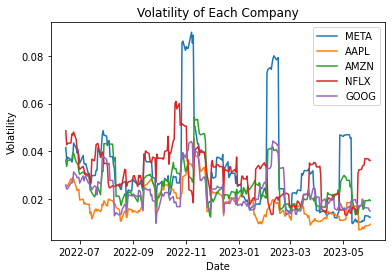

In [518]:
import matplotlib.pyplot as plt

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Iterate over each company
for ticker in df['Ticker'].unique():
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()  # Convert to NumPy array
    dates = company_df['Date'].to_numpy()  # Convert 'Date' column to NumPy array
    plt.plot(dates, volatility_values, label=ticker)

plt.title('Volatility of Each Company')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.legend()
plt.show();

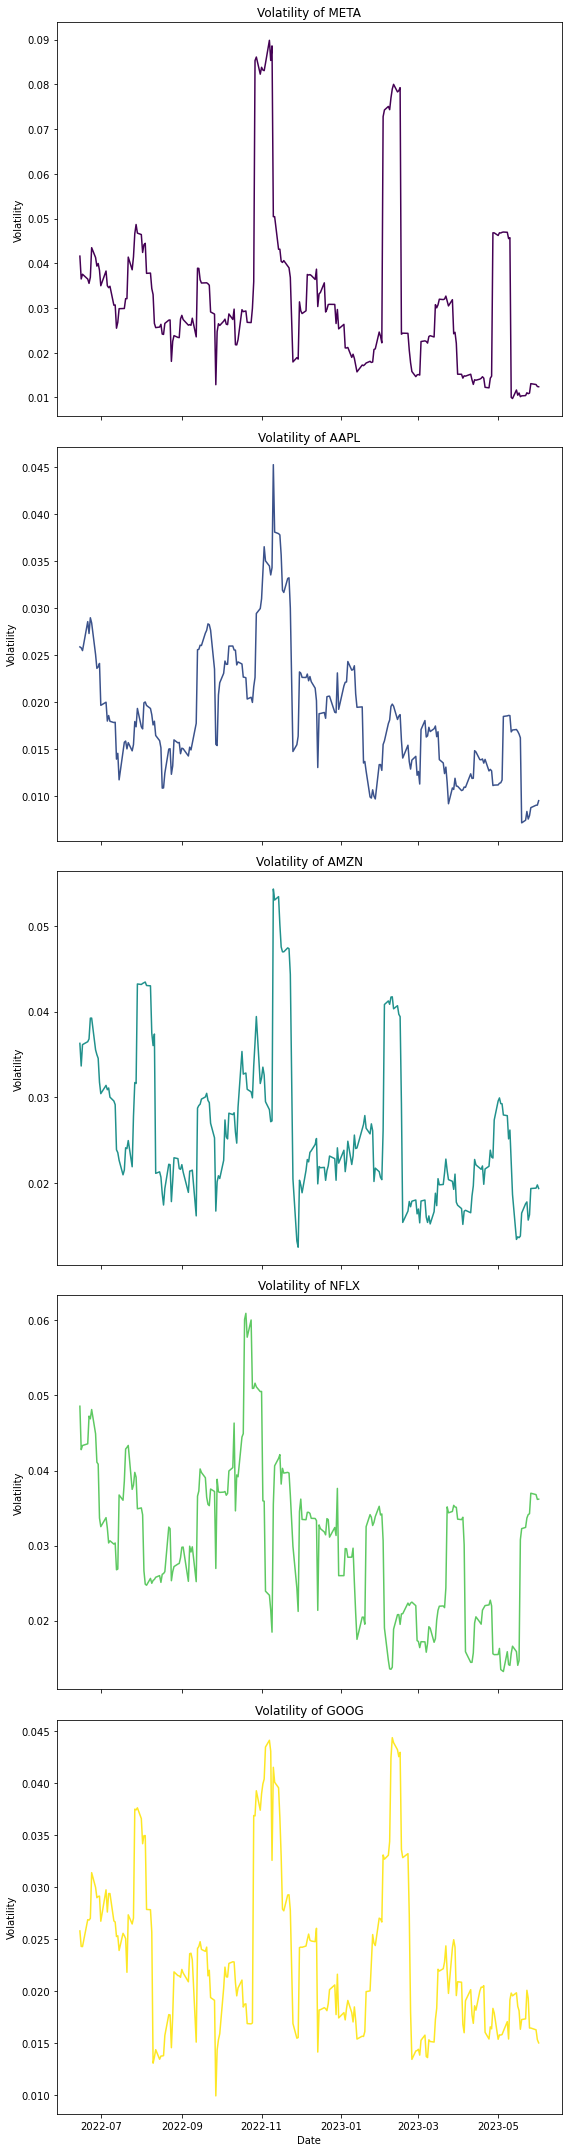

In [519]:
import numpy as np

# Analyze Volatility of each company
df['Volatility'] = df.groupby('Ticker')['Close'].pct_change().rolling(window=10).std().reset_index(0, drop=True)

# Get unique tickers
tickers = df['Ticker'].unique()

# Determine the number of subplots based on the number of tickers
num_subplots = len(tickers)

# Create a colormap using the 'viridis' color map
cmap = plt.get_cmap('viridis')
colors = cmap(np.linspace(0, 1, num_subplots))

# Create subplots
fig, axs = plt.subplots(num_subplots, 1, figsize=(8, 6*num_subplots), sharex=True)

# Iterate over each ticker and plot
for i, ticker in enumerate(tickers):
    company_df = df[df['Ticker'] == ticker]
    volatility_values = company_df['Volatility'].to_numpy()
    dates = company_df['Date'].to_numpy()
    
    # Select the appropriate subplot
    ax = axs[i] if num_subplots > 1 else axs
    
    # Plot the data with the corresponding color
    ax.plot(dates, volatility_values, color=colors[i])
    ax.set_title(f'Volatility of {ticker}')
    ax.set_ylabel('Volatility')

# Set the common x-axis label
axs[-1].set_xlabel('Date')

plt.tight_layout()
plt.show()

## Simple Model

In [520]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1260 entries, 0 to 1259
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Ticker      1260 non-null   object        
 1   Date        1260 non-null   datetime64[ns]
 2   Open        1260 non-null   float64       
 3   High        1260 non-null   float64       
 4   Low         1260 non-null   float64       
 5   Close       1260 non-null   float64       
 6   Adj Close   1260 non-null   float64       
 7   Volume      1260 non-null   int64         
 8   MA10        1215 non-null   float64       
 9   MA20        1165 non-null   float64       
 10  Volatility  1210 non-null   float64       
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 108.4+ KB


In [521]:
df.set_index('Date', inplace=True)

In [522]:
fig = px.line(df, x=df.index, y='Close', color='Ticker', title='Stock Prices Over Time')
fig.show();

### Time-Series Line Plot

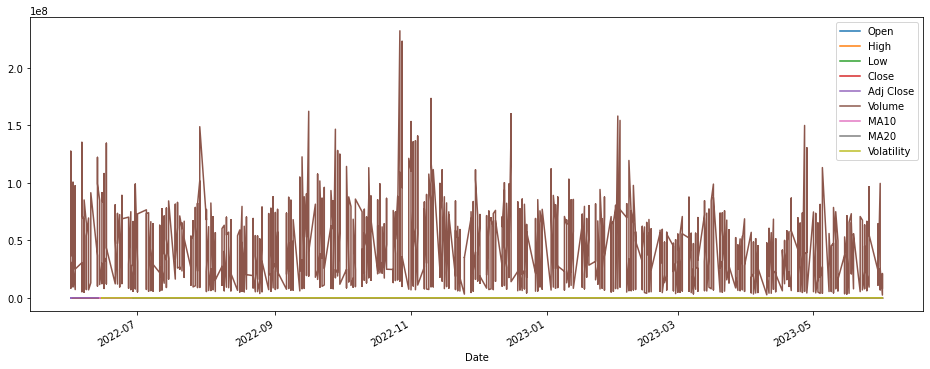

In [523]:
# Draw a line plot using df and .plot() method 
import matplotlib.pyplot as plt
%matplotlib inline

df.plot(figsize = (16,6));

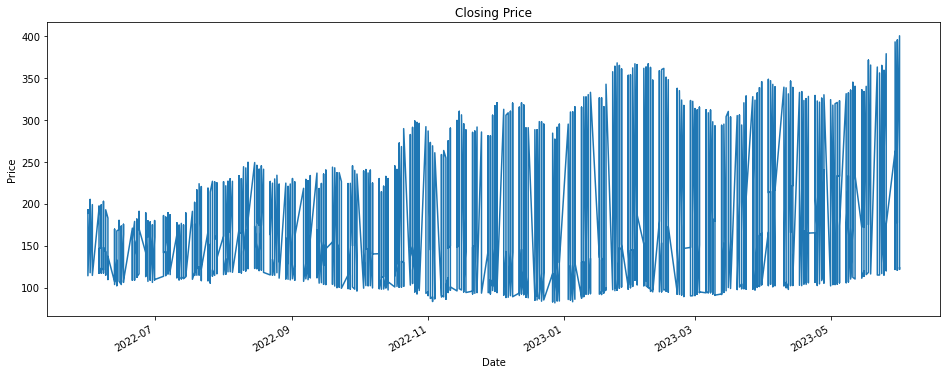

In [524]:
df['Close'].plot(figsize=(16, 6))
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Time-series Dot Plot

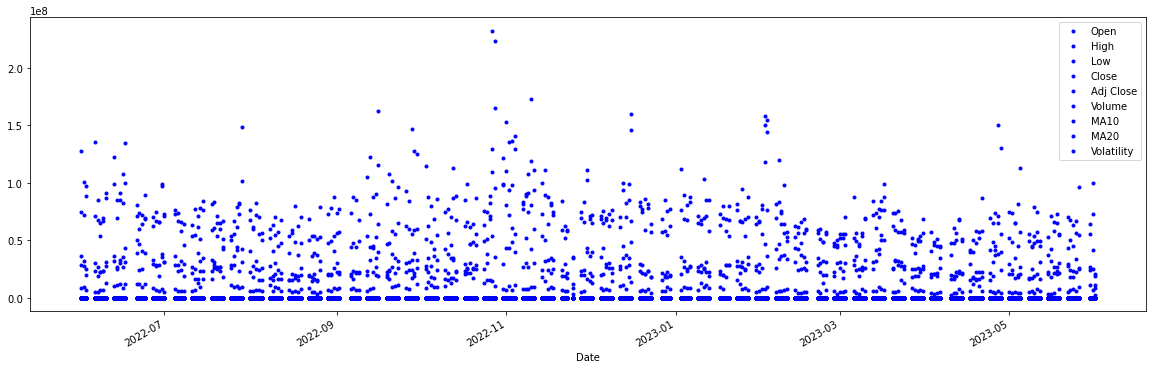

In [525]:
# Draw a dot plot using temp and .plot() method 
df.plot(figsize = (20,6), style = '.b');

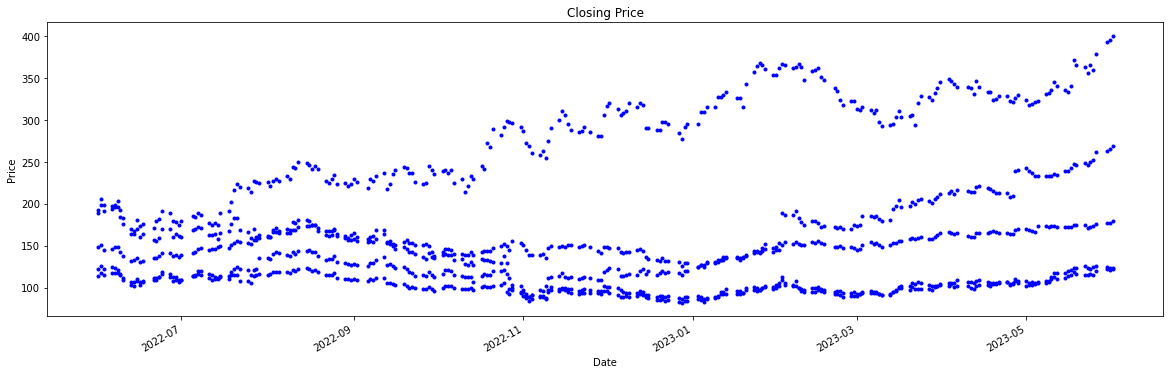

In [526]:
df['Close'].plot(figsize=(20, 6), style= '.b')
plt.title('Closing Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show();

### Separated Annual Yearly Percentage Change

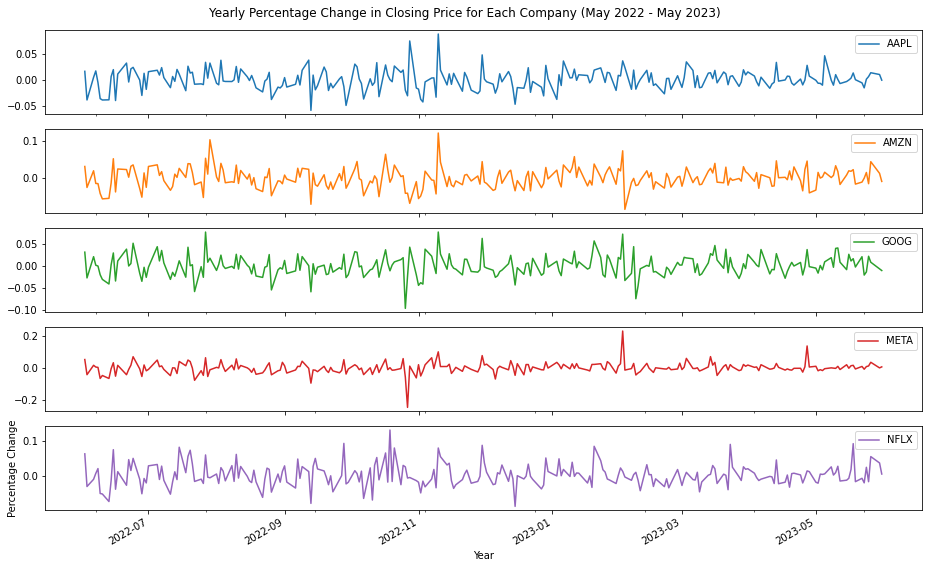

In [527]:
import pandas as pd

# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index.get_level_values('Date') >= start_date) & (df.index.get_level_values('Date') <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index.get_level_values('Date'))
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes as subplots
df_annual_pct_change.plot(figsize=(13, 8), subplots=True, legend=True)

# Set the plot title and labels
plt.suptitle('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Year')
plt.ylabel('Percentage Change')

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

### All Annual Together

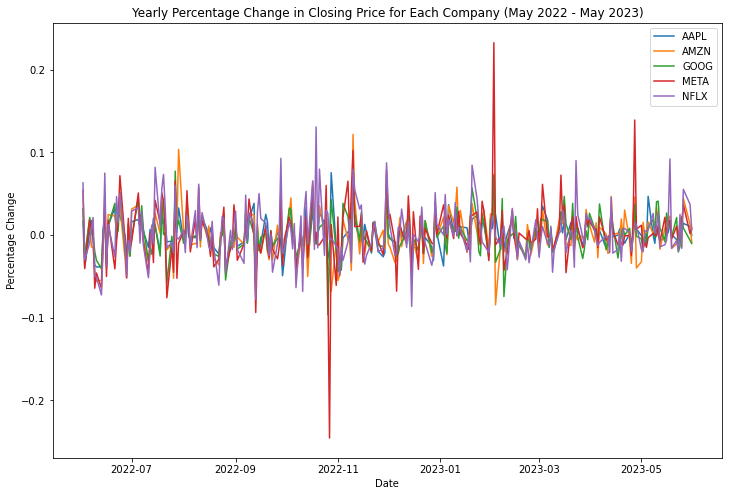

In [528]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot the annual percentage changes
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.plot(df_annual_pct_change.index.to_numpy(), df_annual_pct_change[column].values, label=column)

# Set the plot title and labels
plt.title('Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Date')
plt.ylabel('Percentage Change')
plt.legend()

# Display the plot
plt.show();

### Histogram

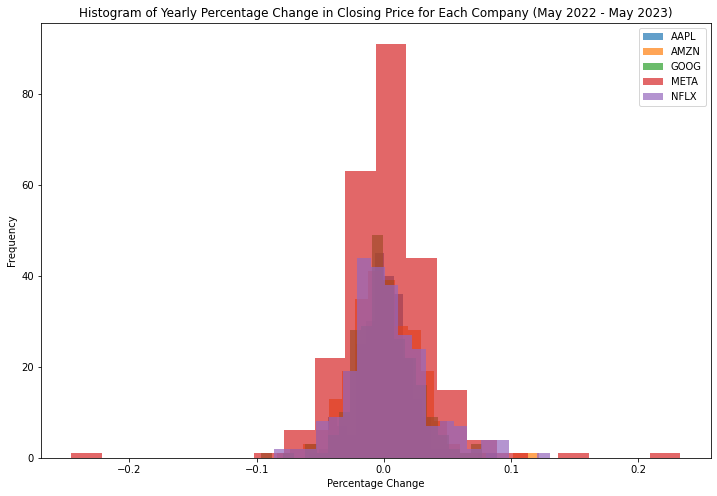

In [529]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Create a new DataFrame to store the annual percentage changes for each company
df_annual_pct_change = pd.DataFrame()

# Iterate over each group
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    # Store the annual percentage changes in the new DataFrame
    df_annual_pct_change[ticker] = pct_change

# Plot a histogram for each company
plt.figure(figsize=(12, 8))
for column in df_annual_pct_change.columns:
    plt.hist(df_annual_pct_change[column].dropna(), bins=20, alpha=0.7, label=column)

# Set the plot title and labels
plt.title('Histogram of Yearly Percentage Change in Closing Price for Each Company (May 2022 - May 2023)')
plt.xlabel('Percentage Change')
plt.ylabel('Frequency')
plt.legend()

# Display the plot
plt.show();

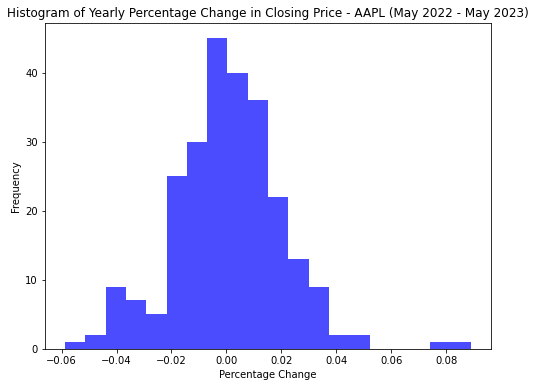

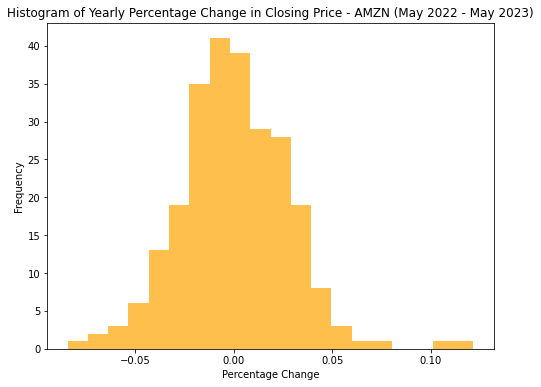

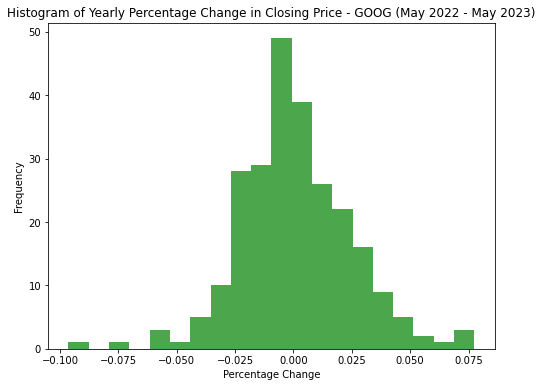

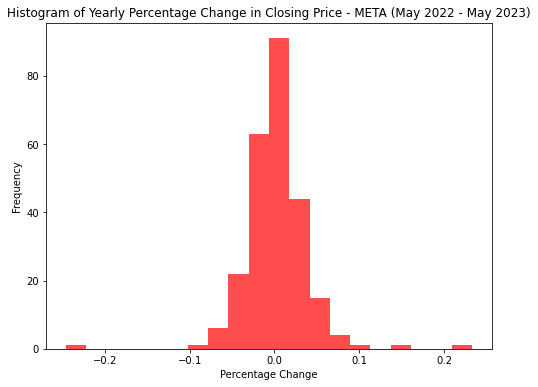

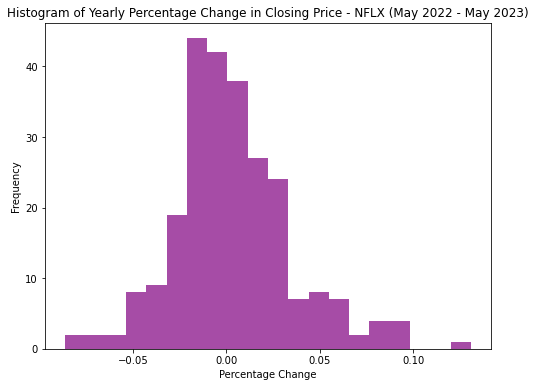

In [530]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Define a list of colors for each histogram
colors = ['blue', 'orange', 'green', 'red', 'purple']  # Add more colors if needed

# Iterate over each group and create separate histograms
for i, (ticker, group) in enumerate(groups):
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)
    
    # Plot a histogram for the current company with the specified color
    plt.figure(figsize=(8, 6))
    plt.hist(pct_change.dropna(), bins=20, alpha=0.7, color=colors[i % len(colors)])
    
    # Set the plot title and labels
    plt.title(f'Histogram of Yearly Percentage Change in Closing Price - {ticker} (May 2022 - May 2023)')
    plt.xlabel('Percentage Change')
    plt.ylabel('Frequency')
    
    # Display the plot for the current company
    plt.show();

The histogram illustrates the distribution of yearly percentage changes in the closing prices of different companies' stocks within the specified time range (May 2022 - May 2023). Each histogram represents a specific company, identified by its ticker symbol. 

The x-axis of the histogram represents the range of percentage changes, while the y-axis represents the frequency or count of occurrences for each range. The histogram is divided into bins, where each bin represents a range of percentage changes. The height of each bar in the histogram indicates the number of instances falling within that range.

By analyzing the histogram, we can gain insights into the volatility and distribution of price changes for each company during the given period. A wider and more spread-out distribution suggests higher price volatility, while a narrower distribution indicates more stable price behavior. Additionally, we can identify any patterns or outliers in the data that might be worth investigating further.

In [531]:
import seaborn as sns
import numpy as np
from scipy.stats import gaussian_kde

### Density Plot 

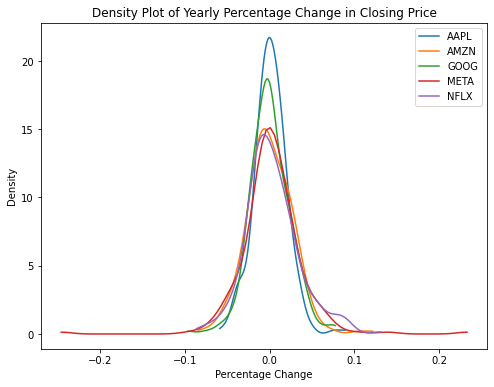

In [532]:
# Filter the DataFrame for the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker' column
groups = df_filtered.groupby('Ticker')

# Set up the figure and axis
fig, ax = plt.subplots(figsize=(8, 6))

# Iterate over each group and create separate density plots
for ticker, group in groups:
    # Calculate the percentage change of the closing prices
    pct_change = group['Close'].pct_change()
    # Align the length of values with the length of the index
    pct_change = pct_change.reindex(group.index)

    # Compute the kernel density estimate
    kde = gaussian_kde(pct_change.dropna())

    # Generate x-values for the density plot
    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Plot the density line for the current company
    ax.plot(x, kde(x), label=ticker)

# Set the plot title and labels
ax.set_title('Density Plot of Yearly Percentage Change in Closing Price')
ax.set_xlabel('Percentage Change')
ax.set_ylabel('Density')

# Add a legend
ax.legend()

# Display the plot
plt.show();

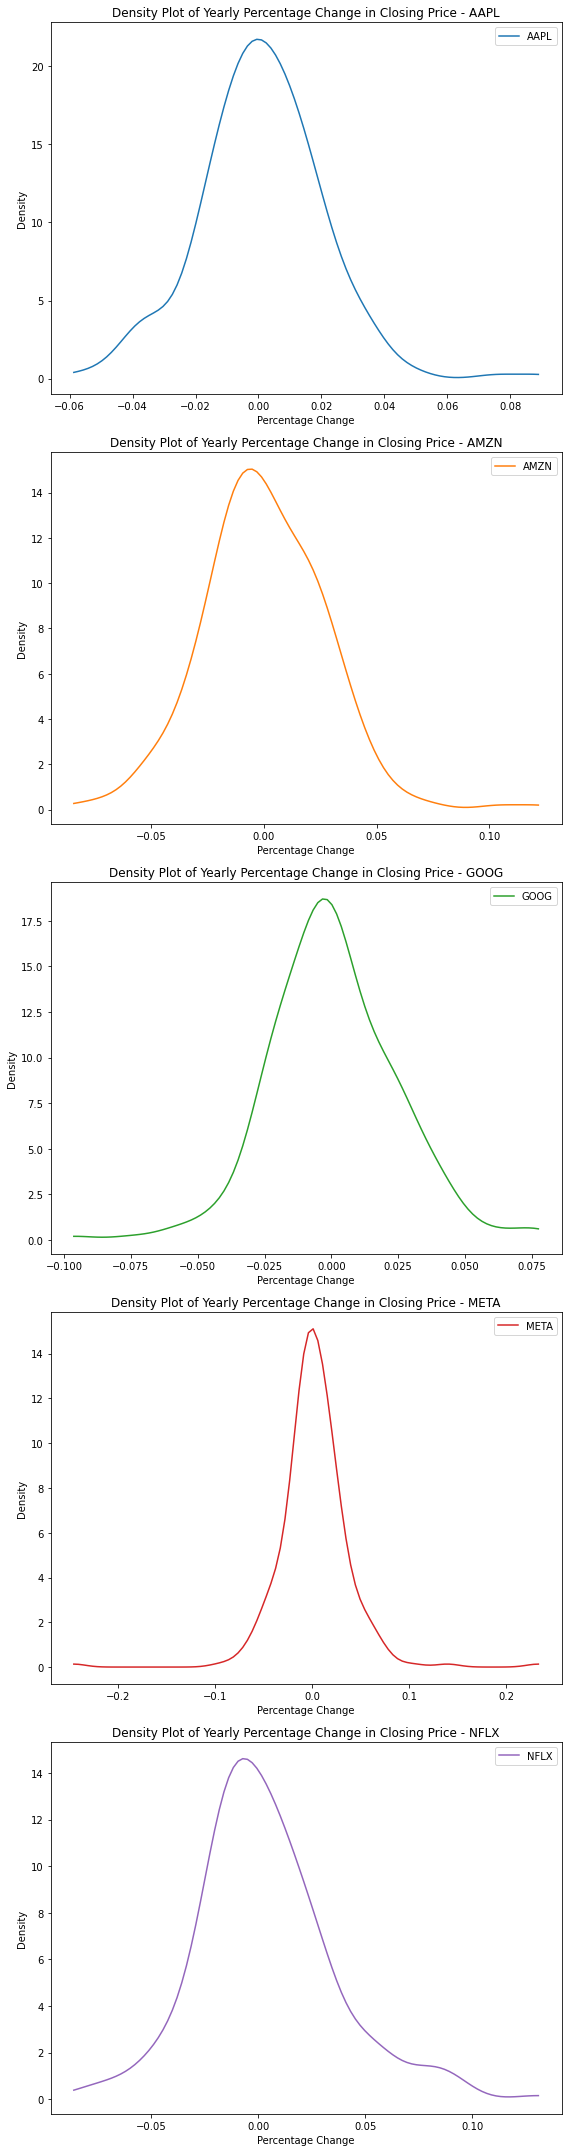

In [533]:
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

groups = df_filtered.groupby('Ticker')

# Determine the number of groups
num_groups = len(groups)

# Set up the figure and subplots
fig, axes = plt.subplots(num_groups, 1, figsize=(8, 6*num_groups))

# Iterate over each group and create separate density plots
for i, (ticker, group) in enumerate(groups):
    pct_change = group['Close'].pct_change()
    pct_change = pct_change.reindex(group.index)

    kde = gaussian_kde(pct_change.dropna())

    x = np.linspace(pct_change.min(), pct_change.max(), num=100)

    # Use a different color for each group
    color = plt.cm.tab10(i)

    # Plot the density line for the current company on its own subplot
    ax = axes[i] if num_groups > 1 else axes
    ax.plot(x, kde(x), color=color, label=ticker)

    # Set the subplot title and labels
    ax.set_title(f'Density Plot of Yearly Percentage Change in Closing Price - {ticker}')
    ax.set_xlabel('Percentage Change')
    ax.set_ylabel('Density')

    # Add a legend to each subplot
    ax.legend()

# Adjust spacing between subplots
plt.tight_layout()

# Display the plot
plt.show();

### Box Plot
- Shows distributiions of the closing price of each company in FAANG

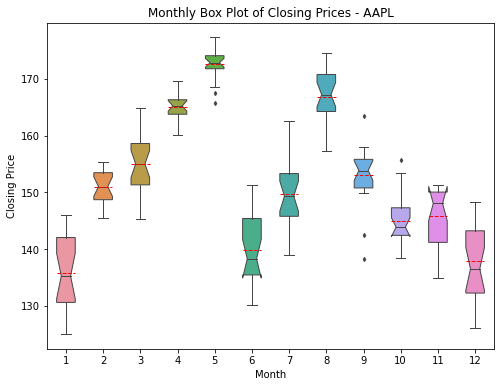

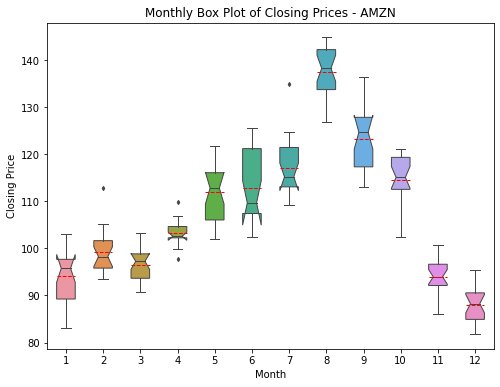

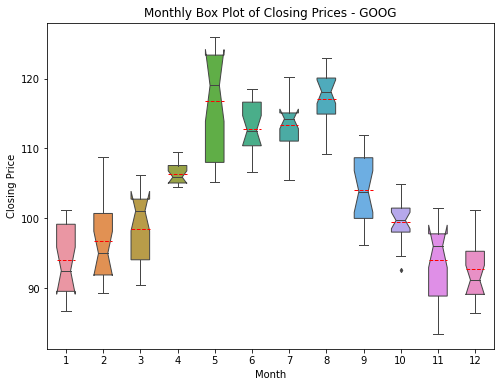

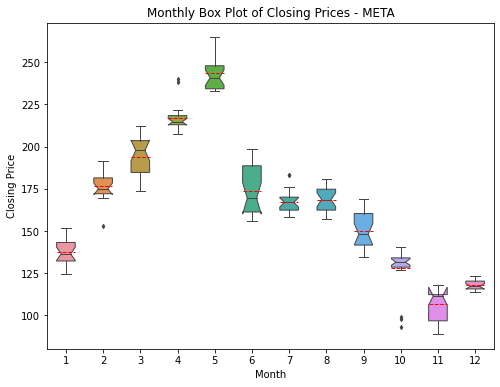

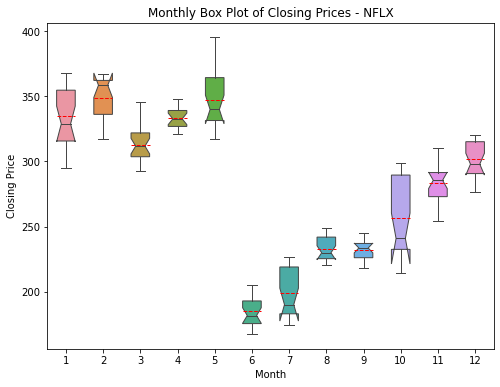

In [534]:
# Set the desired time range
start_date = pd.to_datetime('2018-06-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Group the filtered DataFrame by 'Ticker'
groups = df_filtered.groupby('Ticker')

# Iterate over each group and create a separate box plot for each company
for ticker, group in groups:
    # Create a new figure and axis for each company
    fig, ax = plt.subplots(figsize=(8, 6))

    # Extract the closing prices for the current company
    closing_prices = group['Close']

    # Create the box plot for the current company
    sns.boxplot(x=group.index.month, y=closing_prices, ax=ax, width=0.5, linewidth=1, fliersize=3, whis=1.5, notch=True, showfliers=True, showmeans=True, meanline=True, meanprops={'color': 'red', 'linestyle': '--'})

    # Set the plot title and labels
    ax.set_title(f'Monthly Box Plot of Closing Prices - {ticker}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Closing Price')

    # Display the plot
    plt.show();

### Heat Maps

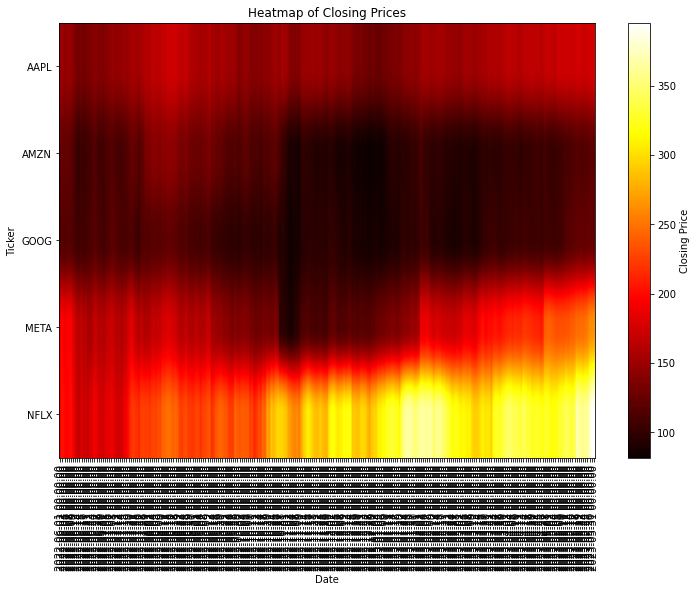

In [535]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Pivot the DataFrame to have 'Ticker' as columns and 'Date' as index
pivot_df = df_filtered.pivot(columns='Ticker', values='Close')

# Create the heatmap
plt.figure(figsize=(12, 8))
plt.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the tick labels and positions
plt.xticks(range(len(pivot_df.index)), pivot_df.index, rotation=90)
plt.yticks(range(len(pivot_df.columns)), pivot_df.columns)

# Set the colorbar
plt.colorbar(label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.show();

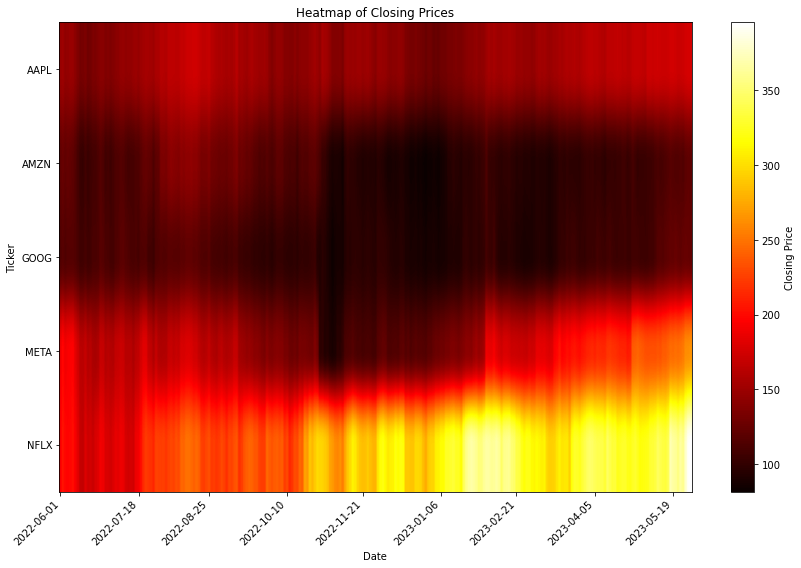

In [536]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Pivot the DataFrame to have 'Ticker' as columns and 'Date' as index
pivot_df = df_filtered.pivot(columns='Ticker', values='Close')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = range(len(pivot_df.columns))
y_tick_labels = pivot_df.columns
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

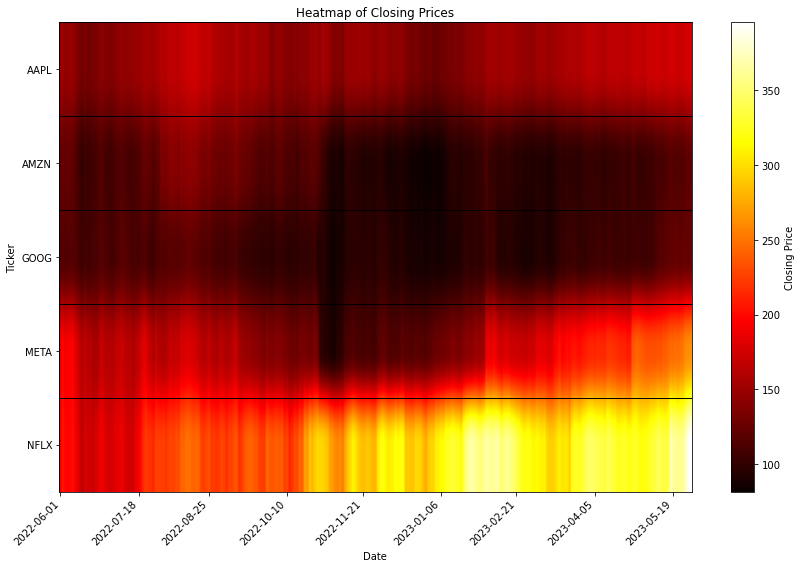

In [537]:
from matplotlib.patches import Rectangle

# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Pivot the DataFrame to have 'Ticker' as columns and 'Date' as index
pivot_df = df_filtered.pivot(columns='Ticker', values='Close')

# Create the heatmap
fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(pivot_df.values.T, cmap='hot', aspect='auto')

# Set the x-axis tick labels and positions
x_ticks = range(len(pivot_df.index))
x_tick_labels = pivot_df.index.strftime('%Y-%m-%d')  # Format dates as desired
ax.set_xticks(x_ticks)
ax.set_xticklabels(x_tick_labels, rotation=45, ha='right')
ax.xaxis.set_major_locator(mdates.MonthLocator())  # Adjust tick frequency if needed

# Set the y-axis tick labels and positions
y_ticks = range(len(pivot_df.columns))
y_tick_labels = pivot_df.columns
ax.set_yticks(y_ticks)
ax.set_yticklabels(y_tick_labels)

# Add boxes for each company
for i in range(len(pivot_df.columns)):
    rect = Rectangle((-0.5, i - 0.5), len(pivot_df.index), 1, facecolor='none', edgecolor='black')
    ax.add_patch(rect)

# Set the colorbar
plt.colorbar(im, label='Closing Price')

# Set the plot title and labels
plt.title('Heatmap of Closing Prices')
plt.xlabel('Date')
plt.ylabel('Ticker')

# Show the plot
plt.tight_layout()  # Ensure labels are not cut off
plt.show();

### Check for Stationarity 

In [538]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered_F = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'META'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_F = adfuller(time_series)

print(result_F)

(0.19470133180858787, 0.9719628370114387, 0, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 1468.3186141636822)


In [539]:
# Perform the Augmented Dickey-Fuller test
result = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_F[0])
print("p-value:", result_F[1])
print("Critical Values:")
for key, value in result_F[4].items():
    print(f"{key} (at {value} critical value): {result_F[4][key]}")
print("Is Stationary:", result_F[1] < 0.05)

ADF Statistic: 0.19470133180858787
p-value: 0.9719628370114387
Critical Values:
1% (at -3.456780859712 critical value): -3.456780859712
5% (at -2.8731715065600003 critical value): -2.8731715065600003
10% (at -2.572968544 critical value): -2.572968544
Is Stationary: False


In [540]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered_AP = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'AAPL'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_AP = adfuller(time_series)
print(result_AP)

(-1.287719495867021, 0.6347717643621191, 0, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 1156.051538405356)


In [541]:
# Perform the Augmented Dickey-Fuller test
result_AP = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_AP[0])
print("p-value:", result_AP[1])
print("Critical Values:")
for key, value in result_AP[4].items():
    print(f"{key} (at {value} critical value): {result_AP[4][key]}")
print("Is Stationary:", result_AP[1] < 0.05)

ADF Statistic: -1.287719495867021
p-value: 0.6347717643621191
Critical Values:
1% (at -3.456780859712 critical value): -3.456780859712
5% (at -2.8731715065600003 critical value): -2.8731715065600003
10% (at -2.572968544 critical value): -2.572968544
Is Stationary: False


In [542]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered_AM = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'AMZN'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_AM = adfuller(time_series)
print(result_AM)

(-1.5993977327971287, 0.4838960032013154, 0, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 1168.7324208035961)


In [543]:
# Perform the Augmented Dickey-Fuller test
result_AM = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_AM[0])
print("p-value:", result_AM[1])
print("Critical Values:")
for key, value in result_AM[4].items():
    print(f"{key} (at {value} critical value): {result_AM[4][key]}")
print("Is Stationary:", result_AM[1] < 0.05)

ADF Statistic: -1.5993977327971287
p-value: 0.4838960032013154
Critical Values:
1% (at -3.456780859712 critical value): -3.456780859712
5% (at -2.8731715065600003 critical value): -2.8731715065600003
10% (at -2.572968544 critical value): -2.572968544
Is Stationary: False


In [544]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered_N = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'NFLX'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_N = adfuller(time_series)
print(result_N)

(-0.7739689045500455, 0.8266491859402072, 0, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 1664.481156751467)


In [545]:
# Perform the Augmented Dickey-Fuller test
result_N = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_N[0])
print("p-value:", result_N[1])
print("Critical Values:")
for key, value in result_N[4].items():
    print(f"{key} (at {value} critical value): {result_N[4][key]}")
print("Is Stationary:", result_N[1] < 0.05)

ADF Statistic: -0.7739689045500455
p-value: 0.8266491859402072
Critical Values:
1% (at -3.456780859712 critical value): -3.456780859712
5% (at -2.8731715065600003 critical value): -2.8731715065600003
10% (at -2.572968544 critical value): -2.572968544
Is Stationary: False


In [546]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered_G = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Select the closing price of a specific company for the time series analysis
company_ticker = 'GOOG'
time_series = df_filtered[df_filtered['Ticker'] == company_ticker]['Close']

# Perform the Augmented Dickey-Fuller test
result_G = adfuller(time_series)
print(result_G)

(-1.6204274437486441, 0.4725052125512137, 0, 250, {'1%': -3.456780859712, '5%': -2.8731715065600003, '10%': -2.572968544}, 1084.0370258833602)


In [547]:
# Perform the Augmented Dickey-Fuller test
result_G = adfuller(time_series)

# Print the full result with labels
print("ADF Statistic:", result_G[0])
print("p-value:", result_G[1])
print("Critical Values:")
for key, value in result_G[4].items():
    print(f"{key} (at {value} critical value): {result_G[4][key]}")
print("Is Stationary:", result_G[1] < 0.05)

ADF Statistic: -1.6204274437486441
p-value: 0.4725052125512137
Critical Values:
1% (at -3.456780859712 critical value): -3.456780859712
5% (at -2.8731715065600003 critical value): -2.8731715065600003
10% (at -2.572968544 critical value): -2.572968544
Is Stationary: False


### DIfference Transformation

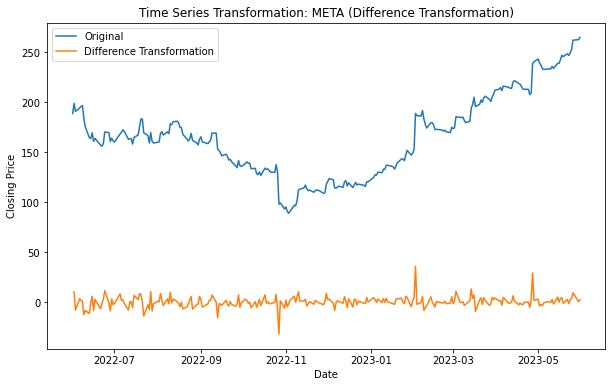

Augmented Dickey-Fuller Test: META (Difference Transformation)
Test Statistic: -15.15510143861847
P-value: 6.711966194789087e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



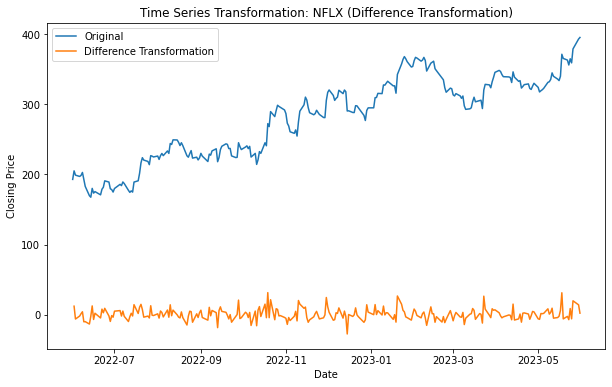

Augmented Dickey-Fuller Test: NFLX (Difference Transformation)
Test Statistic: -15.578712862423291
P-value: 1.9449365553193323e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



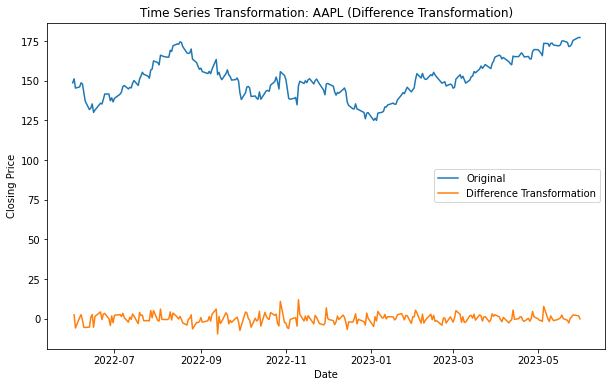

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -7.049727840960817
P-value: 5.566743978577825e-10
Critical Values: {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}



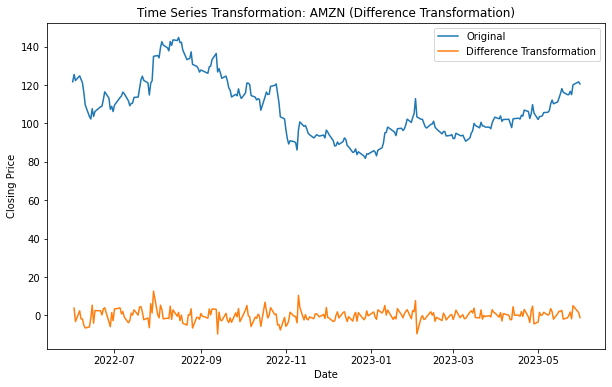

Augmented Dickey-Fuller Test: AMZN (Difference Transformation)
Test Statistic: -15.255117268670794
P-value: 4.9477830157999e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



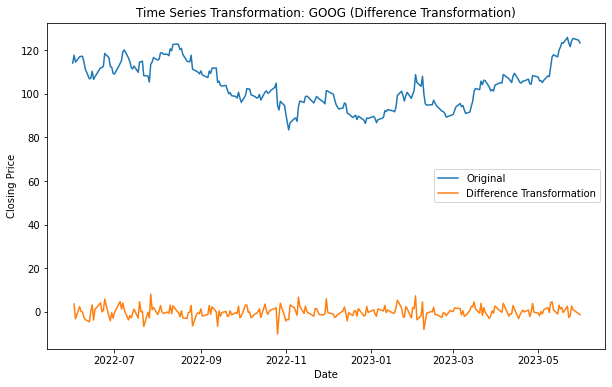

Augmented Dickey-Fuller Test: GOOG (Difference Transformation)
Test Statistic: -15.596689746223094
P-value: 1.8510576469997458e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



In [553]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Define the list of company tickers
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Perform the first difference transformation on the series
    diff_series = time_series.diff().dropna()
    
    # Perform the Augmented Dickey-Fuller test on the differenced series
    result_diff = adfuller(diff_series)
    
    # Plot the original and differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(time_series, label='Original')
    plt.plot(diff_series, label='Difference Transformation')
    plt.title(f'Time Series Transformation: {ticker} (Difference Transformation)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    
    # Print the Augmented Dickey-Fuller test result
    print(f'Augmented Dickey-Fuller Test: {ticker} (Difference Transformation)')
    print(f'Test Statistic: {result_diff[0]}')
    print(f'P-value: {result_diff[1]}')
    print(f'Critical Values: {result_diff[4]}')
    print('')

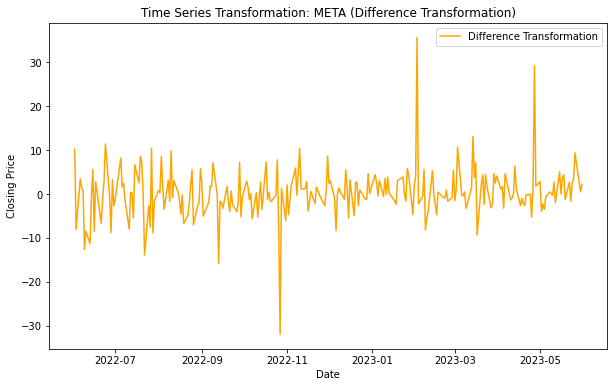

Augmented Dickey-Fuller Test: META (Difference Transformation)
Test Statistic: -15.15510143861847
P-value: 6.711966194789087e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



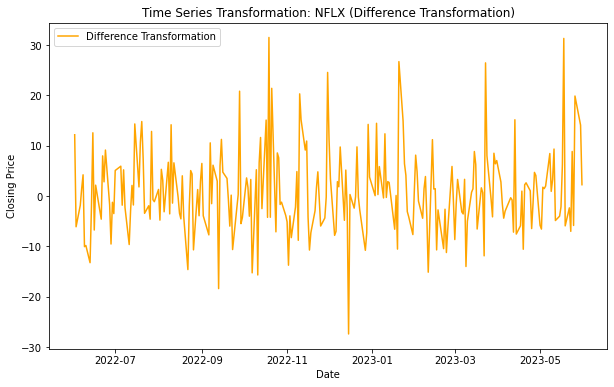

Augmented Dickey-Fuller Test: NFLX (Difference Transformation)
Test Statistic: -15.578712862423291
P-value: 1.9449365553193323e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



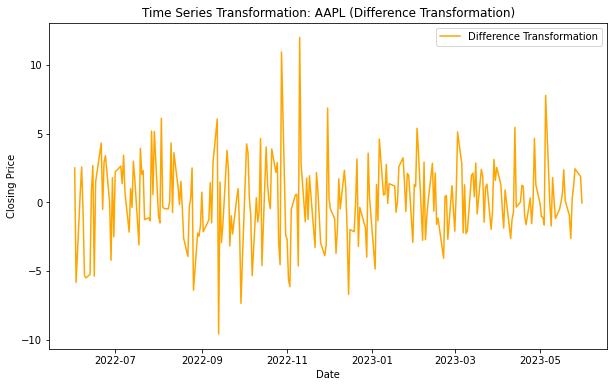

Augmented Dickey-Fuller Test: AAPL (Difference Transformation)
Test Statistic: -7.049727840960817
P-value: 5.566743978577825e-10
Critical Values: {'1%': -3.4573260719088132, '5%': -2.873410402808354, '10%': -2.573095980841316}



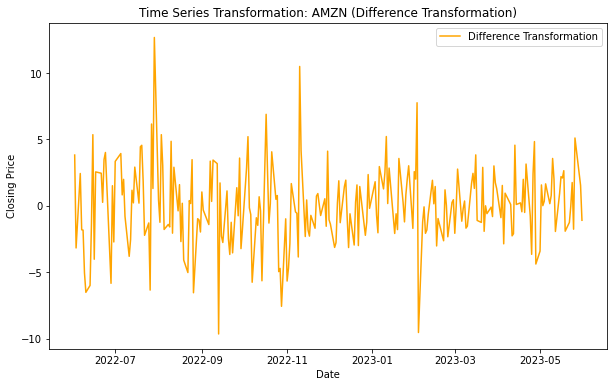

Augmented Dickey-Fuller Test: AMZN (Difference Transformation)
Test Statistic: -15.255117268670794
P-value: 4.9477830157999e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



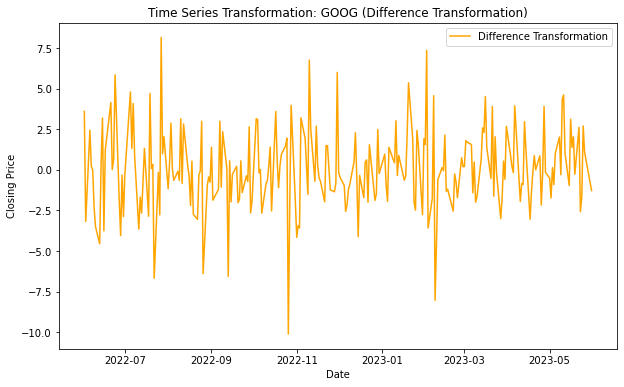

Augmented Dickey-Fuller Test: GOOG (Difference Transformation)
Test Statistic: -15.596689746223094
P-value: 1.8510576469997458e-28
Critical Values: {'1%': -3.4568881317725864, '5%': -2.8732185133016057, '10%': -2.5729936189738876}



In [554]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Define the list of company tickers
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Perform the first difference transformation on the series
    diff_series = time_series.diff().dropna()
    
    # Plot the differenced series
    plt.figure(figsize=(10, 6))
    plt.plot(diff_series, label='Difference Transformation', color='orange')
    plt.title(f'Time Series Transformation: {ticker} (Difference Transformation)')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    
    # Perform the Augmented Dickey-Fuller test on the differenced series
    result_diff = adfuller(diff_series)
    
    # Print the Augmented Dickey-Fuller test result
    print(f'Augmented Dickey-Fuller Test: {ticker} (Difference Transformation)')
    print(f'Test Statistic: {result_diff[0]}')
    print(f'P-value: {result_diff[1]}')
    print(f'Critical Values: {result_diff[4]}')
    print('');

## Model

In [ ]:
## FOCUS JUST ON NETFLIX

### Train-Test Split

In [555]:
# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

In [560]:
# Filter the DataFrame for the desired time range
df_filtered = df.loc[(df.index >= start_date) & (df.index <= end_date)]

# Print the columns of the filtered DataFrame
print(df_filtered.columns)

Index(['Ticker', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA10',
       'MA20', 'Volatility'],
      dtype='object')


In [556]:
df_filtered

,Ticker,Open,High,Low,Close,Adj Close,Volume,MA10,MA20,Volatility
Date,,,,,,,,,,
2022-06-01,META,196.509995,199.529999,185.000000,188.639999,188.639999,36623500,NaN,NaN,NaN
2022-06-02,META,188.449997,200.940002,187.729996,198.860001,198.860001,31951600,NaN,NaN,NaN
2022-06-03,META,195.979996,196.610001,189.779999,190.779999,190.779999,19465000,NaN,NaN,NaN
2022-06-06,META,193.990005,196.919998,188.399994,194.250000,194.250000,30574200,NaN,NaN,NaN
2022-06-07,META,191.929993,196.529999,191.490005,195.649994,195.649994,18828700,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2023-05-24,GOOG,121.879997,122.750000,120.750000,121.639999,121.639999,23087900,121.092,114.36025,0.019294
2023-05-25,GOOG,125.209999,125.980003,122.900002,124.349998,124.349998,33812700,121.837,115.15925,0.016424
2023-05-26,GOOG,124.065002,126.000000,123.290001,125.430000,125.430000,25154700,122.588,116.01975,0.016423


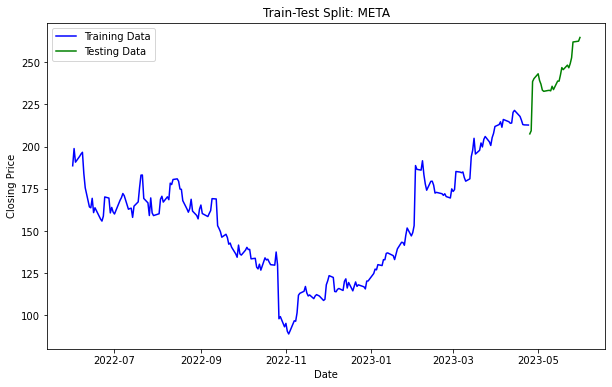

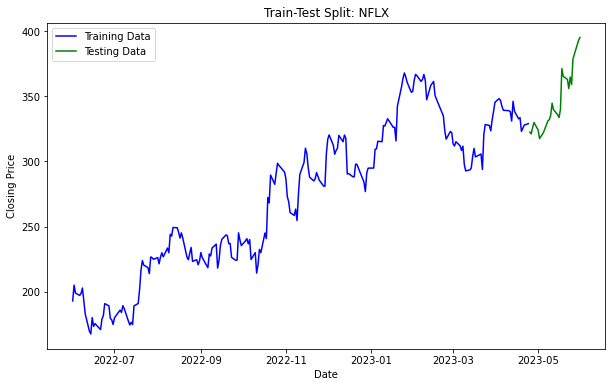

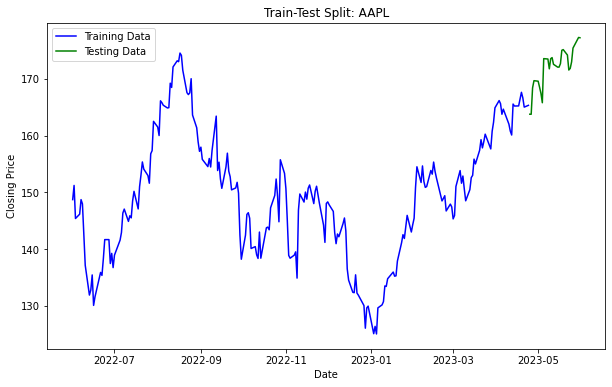

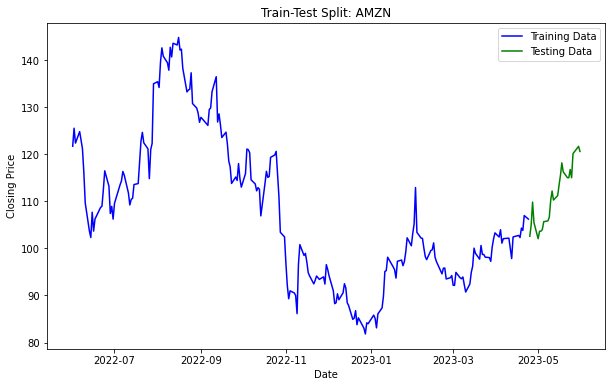

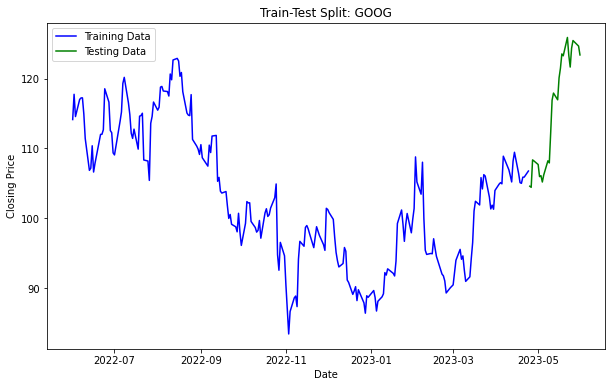

In [557]:
# Define the list of company tickers
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(time_series, test_size=0.1, shuffle=False)
    # Adjust the test_size and shuffle parameters based on your needs
    
    # Plot the training and testing data
    plt.figure(figsize=(10, 6))
    plt.plot(train_data, label='Training Data', color='blue')
    plt.plot(test_data, label='Testing Data', color='green')
    plt.title(f'Train-Test Split: {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.legend()
    plt.show()
    
    # Perform any further modeling or analysis using the train_data and test_data
    # For example, you can train and evaluate an ARIMA or SARIMA model using these data sets
    # You can also perform other preprocessing steps or feature engineering as needed

In [561]:
# save Netflix as training and test data specifically

In [562]:
# Jump into ACF and PACF

# Model Parameters Grid Search

### ARIMA Model Grid Search

In [558]:
import warnings

def grid_search_arima(train_data, convergence_warning=False, summary=False):
    '''
    Function to perform grid search for finding the best p, d, q sequence for ARIMA model
    train_data: Time series data for training
    convergence_warning: True to ignore convergence warnings, False otherwise
    summary: True to print summary for each pdq check, False otherwise
    '''
    results = []

    for p in range(5):
        for d in range(3):
            for q in range(5):
                # try-except to catch warnings and errors
                try:
                    # Catching Warnings
                    with warnings.catch_warnings(record=True) as warn:
                        if convergence_warning:
                            warnings.simplefilter("ignore", ConvergenceWarning)

                        model = ARIMA(train_data, order=(p, d, q)).fit()
                    
                    # If there is a warning, skip
                    if warn:
                        if summary:
                            print(f"\n\033[1m\033[93m{warn[0].message}\nWarning while fitting ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                            print(f"{'-'*100}\n")
                        else:
                            continue
                    
                    # No warning, keep
                    else:
                        aic_score = model.aic
                        results.append((aic_score, p, d, q))
                        if summary:
                            print("p:", p)
                            print("d:", d)
                            print("q:", q)
                            print("AIC score:", aic_score)
                            print(f"{'-'*100}\n")

                except Exception as e:
                    print(f"\033[1m\033[91m{e}\nFailed to fit ARIMA model with p={p}, d={d}, q={q}. Skipping\033[0m")
                    print(f"{'-'*100}\n")

    results.sort()
    best_aic_score, best_p, best_d, best_q = results[0]
    print(f"Best p, d, q for lowest AIC score: {best_aic_score}")
    print("p:", best_p)
    print("d:", best_d)
    print("q:", best_q)

# Example usage:
grid_search_arima(train_data)

Best p, d, q for lowest AIC score: 1053.1399456191893
p: 0
d: 1
q: 0


### SARIMAX Model Grid Search

In [393]:
import itertools
import warnings
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error
from itertools import product

# Define the list of company tickers
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(time_series, test_size=0.1, shuffle=False)
    # Adjust the test_size and shuffle parameters based on your needs
    
    # Define the parameter grid for SARIMAX
    p = [0]
    d = [1]
    q = [0]
    P = range(0, 3)
    D = range(0, 2)
    Q = range(0, 3)
    s = [12]  # Assuming a seasonal period of 12 months
    
    # Perform grid search
    best_aic = float("inf")
    best_params = None
    
    for param in product(p, d, q, P, D, Q, s):
        order = param[:3]
        seasonal_order = param[3:]
        
        try:
            model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)
            results = model.fit()
            
            # Evaluate model using AIC score
            aic = results.aic
            if aic < best_aic:
                best_aic = aic
                best_params = param
                
        except:
            continue
    
    print(f"Best SARIMAX parameters for {ticker}: {best_params}")

Best SARIMAX parameters for META: (0, 1, 0, 0, 1, 1, 12)
Best SARIMAX parameters for NFLX: (0, 1, 0, 0, 1, 1, 12)
Best SARIMAX parameters for AAPL: (0, 1, 0, 0, 1, 1, 12)
Best SARIMAX parameters for AMZN: (0, 1, 0, 0, 1, 1, 12)
Best SARIMAX parameters for GOOG: (0, 1, 0, 0, 1, 1, 12)


### Model

In [394]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

def prediction_model(test_data, **kwargs):
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.plot(train_data, label='train')
    ax.plot(test_data, label='test')

    for label, model in kwargs.items():
        y_hat_test = model.predict(start=test_data.index[0], end=test_data.index[-1], typ='levels')
        ax.plot(y_hat_test, label=label)

    ax.set_xlabel('Year', fontsize=20)
    ax.set_ylabel('Closing Stock Price', fontsize=20)
    ax.set_title('Predicting Closing Stock Price', fontsize=20)
    ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
    ax.tick_params(axis='both', which='major', labelsize=15)
    plt.legend()
    plt.show()

### ARIMA Model

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -702.050
Date:                Thu, 01 Jun 2023   AIC                           1406.100
Time:                        03:03:10   BIC                           1409.511
Sample:                             0   HQIC                          1407.477
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        30.8898      1.138     27.136      0.000      28.659      33.121
Ljung-Box (L1) (Q):                   0.23   Jarque-Bera (JB):              1160.22
Prob(Q):                              0.63   Pr

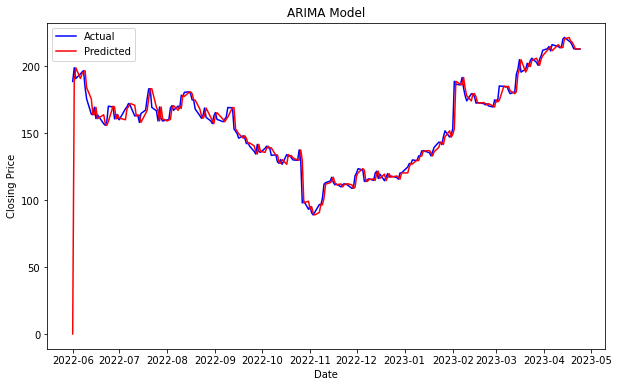

Mean Squared Error: 188.91
Root Mean Squared Error: 13.74
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -792.784
Date:                Thu, 01 Jun 2023   AIC                           1587.569
Time:                        03:03:11   BIC                           1590.980
Sample:                             0   HQIC                          1588.946
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2        69.4463      4.943     14.049      0.000      59.758      79.134
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):           

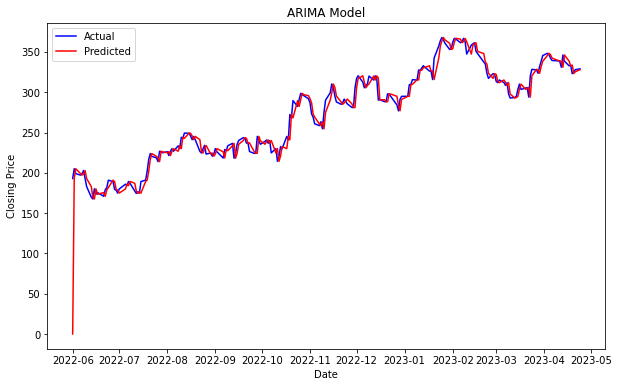

Mean Squared Error: 234.53
Root Mean Squared Error: 15.31
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -562.521
Date:                Thu, 01 Jun 2023   AIC                           1127.042
Time:                        03:03:11   BIC                           1130.454
Sample:                             0   HQIC                          1128.419
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         8.8874      0.645     13.774      0.000       7.623      10.152
Ljung-Box (L1) (Q):                   0.07   Jarque-Bera (JB):           

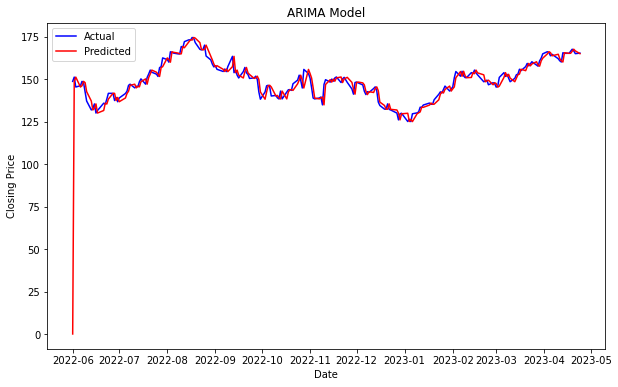

Mean Squared Error: 107.14
Root Mean Squared Error: 10.35
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -567.182
Date:                Thu, 01 Jun 2023   AIC                           1136.364
Time:                        03:03:12   BIC                           1139.775
Sample:                             0   HQIC                          1137.741
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         9.2650      0.641     14.465      0.000       8.010      10.520
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):           

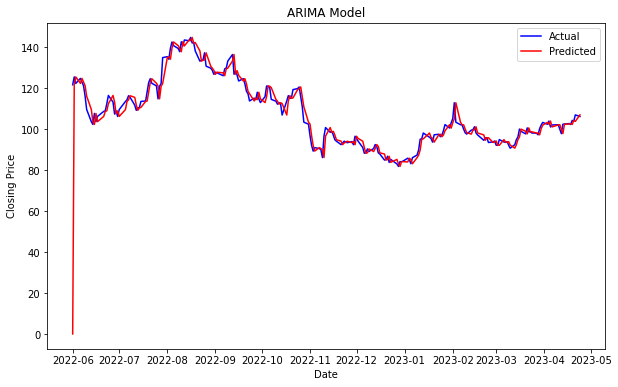

Mean Squared Error: 75.03
Root Mean Squared Error: 8.66
                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  225
Model:                 ARIMA(0, 1, 0)   Log Likelihood                -525.570
Date:                Thu, 01 Jun 2023   AIC                           1053.140
Time:                        03:03:13   BIC                           1056.552
Sample:                             0   HQIC                          1054.517
                                - 225                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         6.3899      0.449     14.218      0.000       5.509       7.271
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             

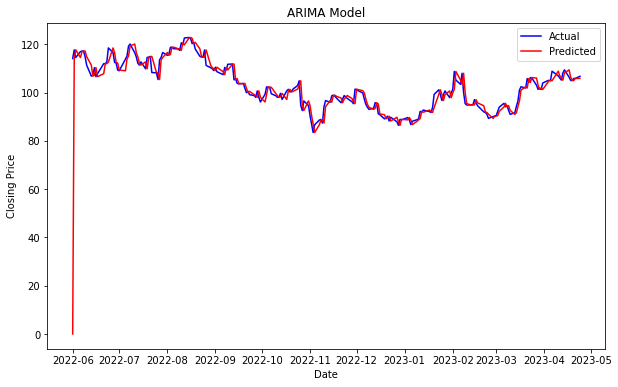

Mean Squared Error: 64.26
Root Mean Squared Error: 8.02


In [395]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def arima_performance(data, pdq):
    '''
    pdq : (p,d,q)
    '''
    arma = ARIMA(data, order=pdq).fit()
    print(arma.summary())
    
    # Make predictions on the entire data
    predictions = arma.predict(start=0, end=len(data)-1)
    
    # Create the index for predictions with the corresponding dates
    index = data.index
    
    # Convert predictions to pandas Series with the new index for plotting
    predictions_series = pd.Series(predictions, index=index)
    
    # Evaluate the model performance
    mse = mean_squared_error(data, predictions)
    rmse = np.sqrt(mse)
    
    # Plot the actual and predicted values
    plt.figure(figsize=(10, 6))
    plt.plot(index.to_numpy(), data.values, label='Actual', color='blue')
    plt.plot(index.to_numpy(), predictions_series.values, label='Predicted', color='red')
    plt.xlabel('Date')
    plt.ylabel('Closing Price')
    plt.title('ARIMA Model')
    plt.legend()
    plt.show()
    
    # Print the model performance metrics
    print(f'Mean Squared Error: {mse:.2f}')
    print(f'Root Mean Squared Error: {rmse:.2f}')
    
    return arma

# Set the desired time range
start_date = pd.to_datetime('2022-05-01')
end_date = pd.to_datetime('2023-05-31')

# Iterate over each company ticker
for ticker in company_tickers:
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Filter the time series based on the desired start and end dates
    time_series_filtered = time_series.loc[start_date:end_date]
    
    # Split the data into training and testing sets
    train_data, test_data = train_test_split(time_series_filtered, test_size=0.1, shuffle=False)
    
    # Call the function to train the ARIMA model and evaluate its performance
    arima_model = arima_performance(train_data, (0, 1, 0))

### SARIMA Model

In [396]:
def get_sarimax_model(data, pdqs):
    model = SARIMAX(data, order=(pdqs[0], pdqs[1], pdqs[2]), seasonal_order=(pdqs[3], pdqs[4], pdqs[5], pdqs[6]),
                    enforce_stationarity=False, enforce_invertibility=False)
    return model

# Define the list of company tickers and their corresponding best SARIMAX parameters
company_tickers = ['META', 'NFLX', 'AAPL', 'AMZN', 'GOOG']  # Replace with actual company tickers
sarimax_parameters = [(0, 1, 0, 0, 1, 1, 12), (0, 1, 0, 0, 1, 1, 12), (0, 1, 0, 0, 1, 1, 12), (0, 1, 0, 0, 1, 1, 12), (0, 1, 0, 0, 1, 1, 12)]  # Replace with actual SARIMAX parameters

# Create a dictionary to store the SARIMAX models for each company
sarimax_models = {}

# Iterate over each company ticker and its corresponding parameters
for ticker, params in zip(company_tickers, sarimax_parameters):
    # Select the closing price of the current company for the time series analysis
    time_series = df_filtered[df_filtered['Ticker'] == ticker]['Close']
    
    # Fit the SARIMAX model with the given parameters
    model = get_sarimax_model(time_series, params)
    sarimax_models[ticker] = model

# Now you have a dictionary (sarimax_models) containing the SARIMAX models for each company
# You can access the models using the company ticker as the key, e.g., sarimax_models['META']

In [418]:
def ts_performance(data, pdq, pdqs, m_type):
    '''
    data : data input
    pdq : (p,d,q)
    pdqs : (p,d,q,s)
    m_type : String indicating how parameters were selected
    '''
    model = SARIMAX(data, order=pdq, seasonal_order=pdqs,
                    enforce_stationarity=False, enforce_invertibility=False).fit()
    
    print(f"{'-'*100}\n\033[1m{m_type}\033[0m\n") 
    print(model.mle_retvals)
    print(f'{model.summary()}\n')
    
    # Obtain the predicted values
    y_hat_train = model.fittedvalues
    y_hat_test = model.predict(start=data.index[0], end=data.index[-1])
    
    # Convert data and index to numpy arrays
    data_arr = np.array(data)
    index_arr = np.array(data.index)
    
    # Plot the actual and predicted values
    fig, ax = plt.subplots(figsize=(20, 12))
    ax.plot(index_arr, data_arr, label='Actual Data', color='blue')
    ax.plot(index_arr, y_hat_train, label='Predicted Train', linestyle='--', color='red')
    ax.plot(index_arr, y_hat_test, label='Predicted Test', linestyle='--', color='orange')
    ax.set_xlabel('Date', fontsize=16)
    ax.set_ylabel('Closing Price', fontsize=16)
    ax.set_title(f'SARIMAX Model Predictions - {m_type}', fontsize=20)
    ax.legend()
    plt.show()
    
    return model

----------------------------------------------------------------------------------------------------
lowest AIC

{'fopt': 1.9606861931978634, 'gopt': array([-3.56324081e-05,  8.17828472e-05, -4.38869243e-03,  2.44277487e-04,
        2.78056644e-04, -2.57087907e-05]), 'fcalls': 399, 'warnflag': 0, 'converged': True, 'iterations': 39}
                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                  225
Model:             SARIMAX(0, 2, 2)x(1, 2, 2, 12)   Log Likelihood                -441.154
Date:                            Thu, 01 Jun 2023   AIC                            894.309
Time:                                    03:24:54   BIC                            913.194
Sample:                                         0   HQIC                           901.971
                                            - 225                                         
Covariance Type:            

ValueError: Multi-dimensional indexing (e.g. `obj[:, None]`) is no longer supported. Convert to a numpy array before indexing instead.

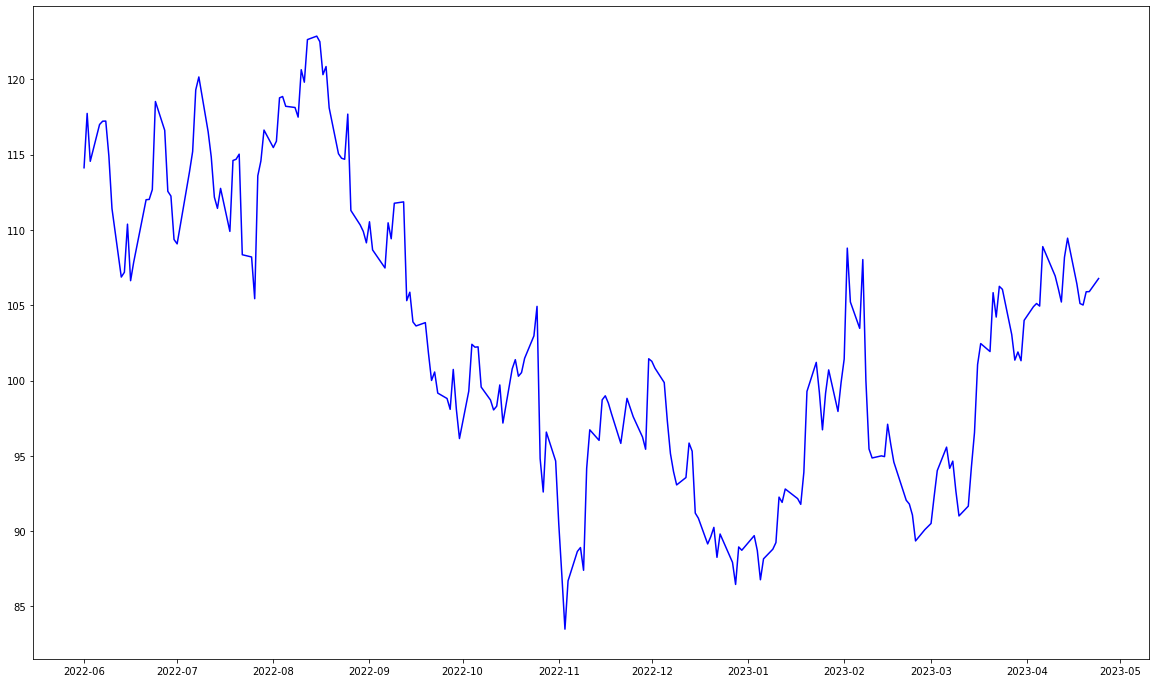

In [419]:
sari_model_aic = ts_performance(train_data, (0, 2, 2), (1, 2, 2, 12), 'lowest AIC') # lowest AIC
sari_model_rmse = ts_performance(train_data, (2, 1, 1), (2, 1, 0, 12), 'lowest RMSE') # lowest RMSE
final_model = ts_performance(limited_df, (2, 1, 1), (2, 1, 0, 12), 'Final Model')

In [420]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select the time series data for the specific company (e.g., 'META')
time_series = df_filtered[df_filtered['Ticker'] == 'META']['Close']

# Split the data into training and testing sets
train_data, test_data = train_test_split(time_series, test_size=0.1, shuffle=False)

# Create the SARIMAX model with the best parameters
order = (0, 1, 0)
seasonal_order = (0, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)

# Fit the SARIMAX model to the training data
results = model.fit()

# Predict the values for training and testing data
train_predictions = results.get_prediction(start=train_data.index[0], end=train_data.index[-1])
test_predictions = results.get_prediction(start=test_data.index[0], end=test_data.index[-1])

# Evaluate the performance of the SARIMAX model
mse = mean_squared_error(train_data, train_predictions.predicted_mean)
rmse = np.sqrt(mse)
mae = mean_absolute_error(train_data, train_predictions.predicted_mean)

print("SARIMAX Model Performance:")
print("Training MSE:", mse)
print("Training RMSE:", rmse)
print("Training MAE:", mae)

KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [423]:
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Select the time series data for the specific company (e.g., 'META')
time_series = df_filtered[df_filtered['Ticker'] == 'META']['Close']

# Convert the index to a datetime index if needed
time_series.index = pd.to_datetime(time_series.index)

# Split the data into training and testing sets
train_data, test_data = train_test_split(time_series, test_size=0.1, shuffle=False)

# Create the SARIMAX model with the best parameters
order = (0, 1, 0)
seasonal_order = (0, 1, 1, 12)
model = sm.tsa.statespace.SARIMAX(train_data, order=order, seasonal_order=seasonal_order)

# Fit the SARIMAX model to the training data
results = model.fit()

# Predict the values for training and testing data
train_predictions = results.get_prediction(start=0, end=len(train_data)-1)
test_predictions = results.get_prediction(start=len(train_data), end=len(train_data)+len(test_data)-1)

# Extract the predicted values
train_predicted_values = train_predictions.predicted_mean
test_predicted_values = test_predictions.predicted_mean

# Calculate the Mean Absolute Error (MAE)
mae = np.mean(np.abs(train_data.values - train_predicted_values))

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(np.mean((train_data.values - train_predicted_values)**2))

print("SARIMAX Model Performance:")
print("Training MSE:", mse)
print("Training RMSE:", rmse)
print("Training MAE:", mae)

SARIMAX Model Performance:
Training MSE: 132.17829873563963
Training RMSE: 15.281237863074763
Training MAE: 5.529496005007285


## Evaluation

## Results

## Conclusion

## Next Steps